In [1]:
import numpy as np
import pandas as pd

<b>Q1.Import and store the data in a data frame. (2.5 points)

In [10]:
Data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',sep='\s+',names=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average Fare','Low price airline','market share','price'])

C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [31]:
Data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average Fare.1,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


<b>Q2.Remove the outliers from the data (5 points)

In [17]:
#Calculate first quartile
q1=Data.quantile(0.25)

In [15]:
#Calculate third quartile
q3=Data.quantile(0.75)

In [18]:
#Calculate inter quartile range
IQR=q3-q1

In [19]:
#Calculate thresholds
Cap1=q1-(1.5*IQR)
Cap2=q3+(1.5*IQR)

In [28]:
#Identify rows wit outliers
drop_id=[]
for col in IQR.index:
    for row in range(0,Data.shape[0]):
        if ((Data.loc[row][col]<Cap1[col]) or (Data.loc[row][col]>Cap2[col])):
            drop_id.append(row)

In [32]:
#Drop rows having outliers
Data.drop(drop_id,inplace=True)

<b>Q3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [39]:
#Dependent variable
Y=Data['Average Fare']

In [77]:
#Indepedent Variables
X=Data.drop(['Average Fare','City1','City2','market leading airline','Low price airline'],axis=1)
X.head(3)

,Distance,Average weekly passengers,market share,Average Fare.1,market share.1,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12


<b>Q4.Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [58]:
#Find out correlation with dependent variable
Corr=Data.corr()['Average Fare']

In [61]:
#Correlation can also be negative,hence absolute value of correlation is considered to drop variables with correlation less than 0.1
drop_corr=[]
if abs(Corr.all())<0.1:
    drop_corr.append(Corr.index)

In [75]:
X.drop(drop_corr,inplace=True)

In [86]:
X.head(3)

,Distance,Average weekly passengers,market share,Average Fare.1,market share.1,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12


<b> None of the columns were dropped as all variables have absolute value of correlation greater than 0.1

<b>Q5.Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

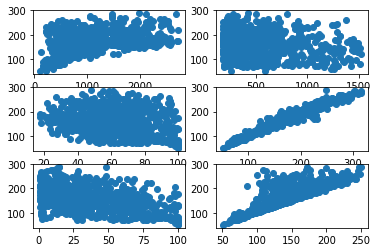

In [148]:
for index,col in enumerate(X.columns):
    plt.subplot(3,2,index+1)
    plt.scatter(X[col],Y)
    plt.xlabel=col
    plt.ylabel='Average Fare'
plt.show()

<b>Q6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [156]:
#Split the data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [158]:
#Build the model
Model=LinearRegression()
Model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>Q.7 Print the coefficients & intercepts of the linear regression model (5 points)

In [165]:
coeffs=(pd.DataFrame({'Independent Vaiables':X.columns,'Coeffiicients':Model.coef_}))

In [168]:
coeffs

,Independent Vaiables,Coeffiicients
0,Distance,0.002681
1,Average weekly passengers,-0.003401
2,market share,0.077984
3,Average Fare.1,0.729859
4,market share.1,-0.032056
5,price,0.232008


In [169]:
intercept=Model.intercept_

In [170]:
print("Intercept is {0}".format(intercept))

Intercept is 4.08454833898773


<b>Q.8 Print the accuracy of the overall model (2.5 points)

In [171]:
#Accuracy of model for test data
Model.score(X_test,Y_test)

0.9699617495264753

In [172]:
#Accuracy of model for training data
Model.score(X_train,Y_train)

0.9724453942703206

In [174]:
#r2_score
from sklearn.metrics import r2_score

In [175]:
Y_pred = Model.predict(X_test)

In [177]:
r2_score(Y_test,Y_pred)

0.9699617495264753